In [1]:
import glob
import os
import pandas as pd
from io import StringIO
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

%matplotlib inline
%load_ext autoreload
%autoreload 2

### RNA-seq short-read sequencing data

In [2]:
dataset = '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR*.gz'

In [3]:
files = glob.glob(dataset)
files[:10]

['/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1035700.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR654041.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR191536.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR343348.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR805884.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR403016.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR846956.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1002075.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR567154.fasta.gz',
 '/cluster/work/grlab/projects/metagenome/benchmark_kingsford/data_fasta/SRR1066641.fasta.gz']

In [4]:
print('Files in the dataset: {}'.format(len(files)))
print('Size of the dataset: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in files]) / 2**30))

Files in the dataset: 2652
Size of the dataset: 2948.94 Gib


In [5]:
data_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in files], index=[x.split('/')[-1][:-len('.fasta.gz')] for x in files])
data_size.head()

SRR1035700    1.269203
SRR654041     0.349531
SRR191536     0.000381
SRR343348     0.112754
SRR805884     2.364810
dtype: float64

In [6]:
annotation = '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/*.color.annodbg'
anno_files = glob.glob(annotation)
anno_files[:10]

['/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR101424.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR1047839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR543516.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR066463.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR306839.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR448330.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR353645.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR934636.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR343345.color.annodbg',
 '/cluster/home/mikhaika/big_graph/graph_SRR_k20_2/annotation/SRR567136.color.annodbg']

In [7]:
print('Size of annotation: {:.2f} Gib'.format(sum([os.path.getsize(x) for x in anno_files]) / 2**30))

Size of annotation: 24.40 Gib


In [8]:
column_size = pd.Series(data=[os.path.getsize(x) / 2**30 for x in anno_files], index=[x.split('/')[-1][:-len('.color.annodbg')] for x in anno_files])
column_size.head()

SRR101424     0.002247
SRR1047839    0.007285
SRR543516     0.003775
SRR066463     0.004361
SRR306839     0.009361
dtype: float64

In [9]:
stats = pd.DataFrame(data_size, columns=['ComprData'])
stats['Annotation'] = column_size
stats.head()

,ComprData,Annotation
SRR1035700,1.269203,1.385124e-02
SRR654041,0.349531,3.799959e-03
SRR191536,0.000381,2.695192e-04
SRR343348,0.112754,2.235174e-08
SRR805884,2.364810,1.031428e-02


In [10]:
!./metagraph/build/metagengraph stats -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

Statistics for annotation /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg
colors: 2586
sparsity: 9.987877e-01


In [11]:
%%bash --out output --err error

./metagraph/build/metagengraph stats -v -a /cluster/work/grlab/projects/metagenome/benchmark_kingsford_results/graph_SRR_k20_2/merged_annotation.color.annodbg

In [12]:
print(error)

In [13]:
string_io = StringIO('\n'.join(output.split('\n')[5:-95]))
annotation_stats = pd.read_csv(string_io, delimiter=' ', header=None, usecols=[1, 3, 6], names=['File', 'Density', 'SetBits'])
annotation_stats.tail()

,File,Density,SetBits
2581,</cluster/work/grlab/projects/metagenome/bench...,"0.000424173,",2815011
2582,</cluster/work/grlab/projects/metagenome/bench...,"0.000303706,",2015536
2583,</cluster/work/grlab/projects/metagenome/bench...,"0.000292856,",1943530
2584,</cluster/work/grlab/projects/metagenome/bench...,"0.0012861,",8535158
2585,</cluster/work/grlab/projects/metagenome/bench...,"0.000378694,",2513189


In [14]:
annotation_stats.index = annotation_stats['File'].apply(lambda x: x.split('/')[-1].split('.')[0])
del annotation_stats['File']
annotation_stats.head()

,Density,SetBits
File,,
SRR014494,"0.000144409,",958367
SRR014495,"0.00015557,",1032433
SRR029131,"0.000152508,",1012116
SRR032273,"0.00122159,",8107049
SRR032276,"0.00122654,",8139884


In [15]:
stats['Density'] = annotation_stats['Density']
stats['SetBits'] = annotation_stats['SetBits']

stats.head()

,ComprData,Annotation,Density,SetBits
SRR1035700,1.269203,1.385124e-02,"0.00144599,",9596247.0
SRR654041,0.349531,3.799959e-03,"0.000337308,",2238536.0
SRR191536,0.000381,2.695192e-04,"1.81728e-05,",120603.0
SRR343348,0.112754,2.235174e-08,NaN,NaN
SRR805884,2.364810,1.031428e-02,"0.00104853,",6958558.0


In [22]:
stats.sort_values('Annotation', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits
SRR1292583,0.857033,0.060838,"0.00804718,",53404879.0
SRR1292584,0.909083,0.060888,"0.00805522,",53458206.0
SRR1292582,0.961369,0.070980,"0.00964188,",63988017.0
SRR1047874,6.974367,0.397054,"0.0791085,",525000763.0
SRR1047873,6.675645,0.431632,"0.0847846,",562669988.0
SRR1047864,6.918407,0.453624,"0.0914867,",607148479.0
SRR1047872,7.521031,0.476588,"0.0985052,",653726473.0
SRR1047865,7.842816,0.487695,"0.101897,",676235746.0
SRR1047871,7.562531,0.504444,"0.106989,",710027833.0
SRR1047869,8.024444,0.512705,"0.109529,",726885516.0


In [23]:
stats.sort_values('ComprData', inplace=True)
stats.iloc[-15:]

,ComprData,Annotation,Density,SetBits
SRR1047867,8.485607,0.555417,"0.122585,",813529331.0
SRR950081,8.515743,0.014493,"0.0015271,",10134541.0
SRR950083,8.555241,0.013832,"0.0014436,",9580406.0
SRR1047868,8.583612,0.558689,"0.123583,",820151963.0
SRR950084,9.414674,0.019828,"0.00220178,",14612072.0
SRR972716,9.675661,0.005011,"0.000465337,",3088193.0
SRR972713,10.327738,0.009215,"0.00092166,",6116564.0
SRR972717,10.408531,0.007865,"0.000766275,",5085361.0
SRR972715,10.619117,0.005458,"0.00051267,",3402321.0
SRR1047863,10.658170,0.525813,"0.113537,",753484144.0


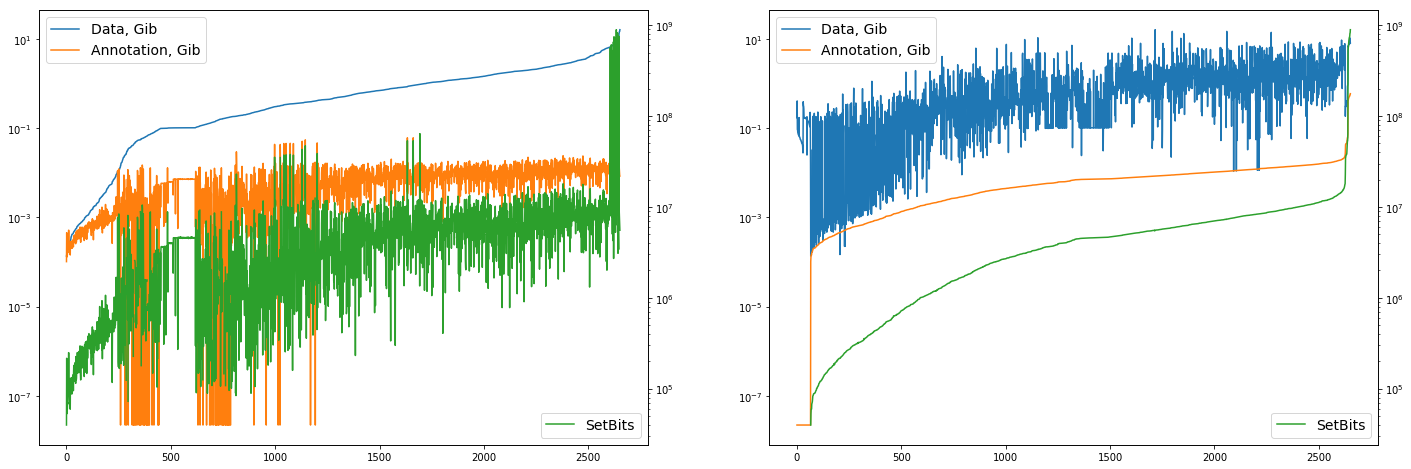

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left', fontsize=14)
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right', fontsize=14)
right_ax.set_yscale('log')

plt.show()

In [17]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.rc('font', family='serif')#, serif='Times')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('axes', labelsize=12)
plt.rc('legend', fontsize=10)
#plt.rcParams['mathtext.fontset'] = 'stix'
#plt.rcParams['font.family'] = 'STIXGeneral'
params = {
#'text.usetex': True,
#'font.size': 15,
#'text.latex.unicode': True
}
plt.rcParams.update(params)

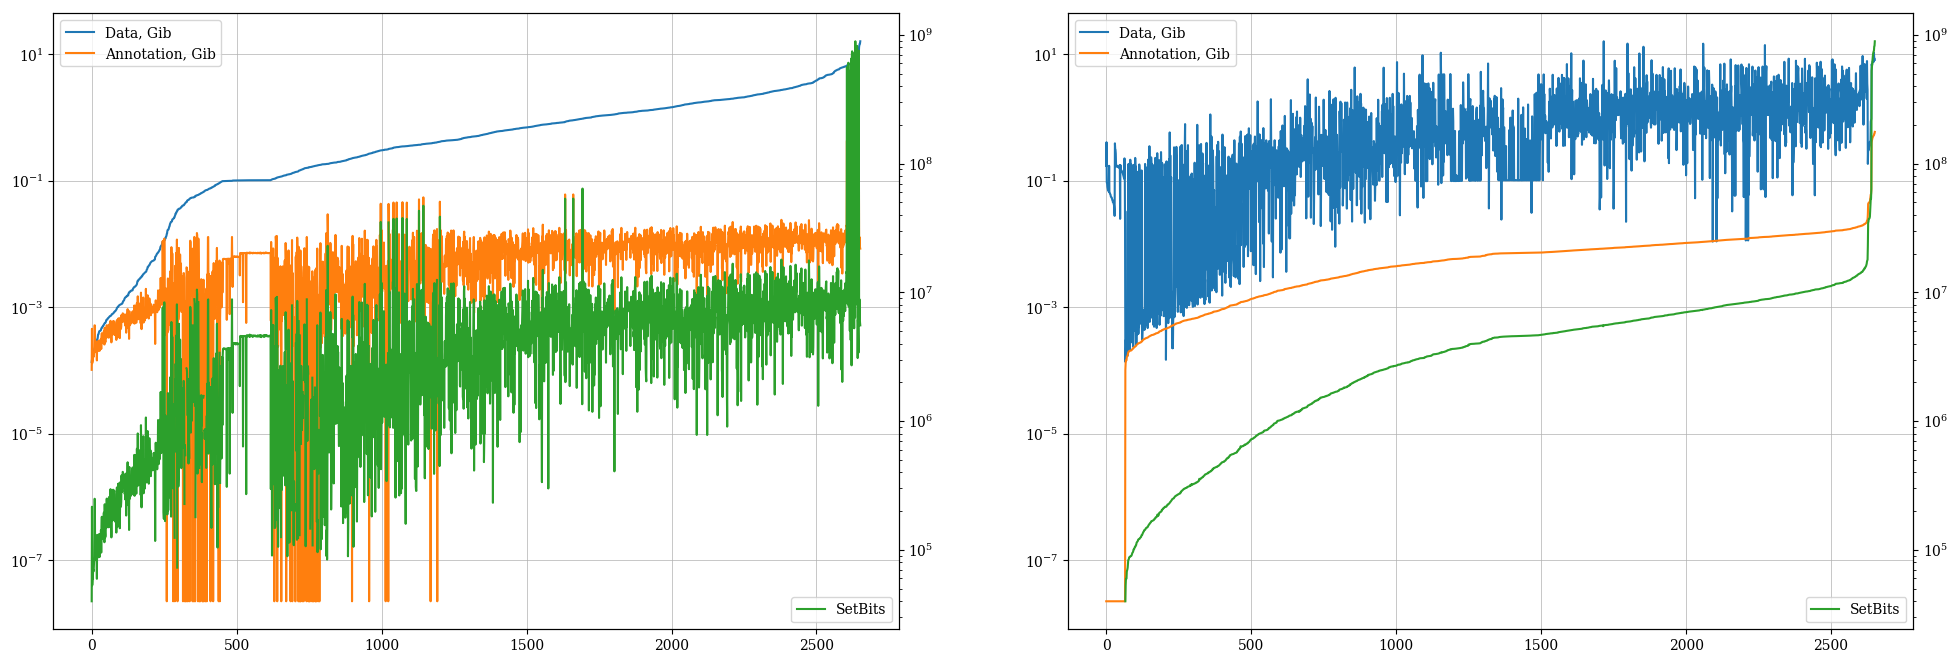

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(24, 8))

stats.sort_values('ComprData', inplace=True)
ax = axes[0]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)
#ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#right_ax.tick_params(reset=True, direction='in', which='both', bottom=True, top=True, left=True, right=True, width=0.5)
#lg = ax.legend(frameon=False, loc=(0.03, 0.05))
#lg.get_frame().set_linewidth(0.5)

stats.sort_values('Annotation', inplace=True)
ax = axes[1]
ax.plot(stats['ComprData'].values, label='Data, Gib')
ax.plot(stats['Annotation'].values, label='Annotation, Gib')
ax.legend(loc='upper left')
ax.set_yscale('log')
right_ax = ax.twinx()
right_ax._get_lines.prop_cycler = ax._get_lines.prop_cycler
right_ax.plot(stats['SetBits'].values, label='SetBits')
right_ax.legend(loc='lower right')
right_ax.set_yscale('log')
ax.grid(linewidth=0.5)

plt.show()